In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Take in the data and the error.
Then do some analysis on what cuts need to be done.

In [2]:
df=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_full_ps_1')
err=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err_full_ps_1')

Make a distance cut for everything to be less than 4000pc


In [3]:
df=df[10**((df['mu']+5)/5)<4000]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

Also, we want to make a cut on the mu/err_mu.

In [4]:
from astropy.coordinates import SkyCoord
import astropy.units as u
galactic_coord = SkyCoord(ra=df['ra'].values*u.degree, dec=df['dec'].values*u.degree, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
b=galactic_coord.b.value

In [5]:
df=df[err['mu_error']/df['mu']<0.01]
err=err.loc[df.index]

Plot as a function of distance to show the brightness of sources.
These are a few sources which are quite bright. Which seem to cause issues in the HR diagram. There is a high chance these could be binary stars. We will cut them out now
and later we will have to cut out these from the test set too as the underlying pdf doenst include extinction.

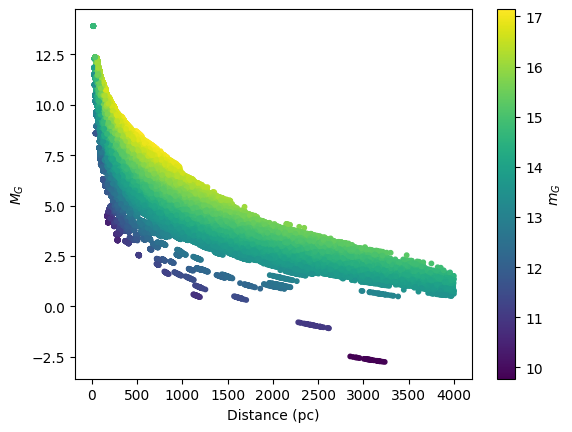

In [6]:
bprp=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
gk=df['g_mean_psf_mag']-df['ks_m']

G=df['phot_g_mean_mag']-df['mu']
scatter = plt.scatter((10**((df['mu']+5)/5)),G, s=10, c=df['phot_g_mean_mag'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$m_G$')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$M_G$')

# Show plot
plt.show()

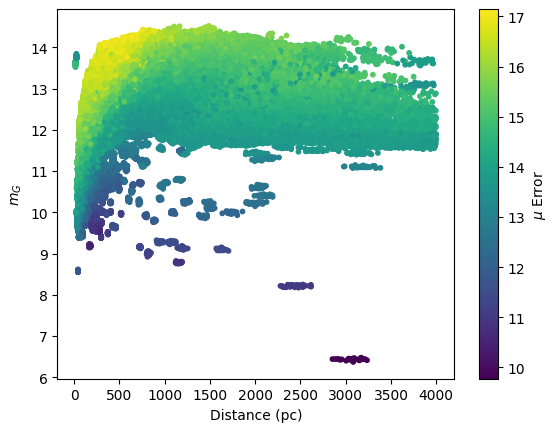

In [7]:
bprp=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
gk=df['g_mean_psf_mag']-df['ks_m']

g=df['ks_m']

scatter = plt.scatter(10**((df['mu']+5)/5),g, s=10, c=df['phot_g_mean_mag'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$\mu$ Error')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$m_G$')

# Show plot
plt.show()

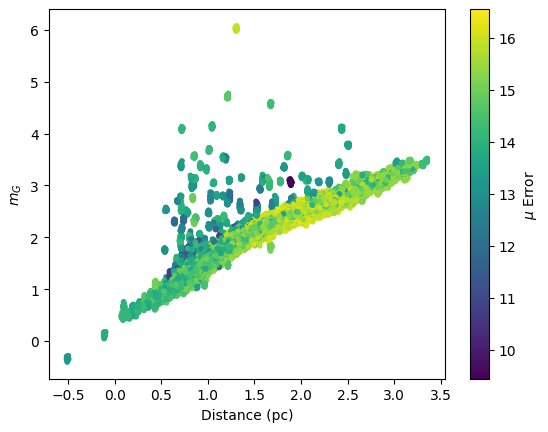

In [8]:
y=df['i_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']

scatter = plt.scatter(x,y, s=10, c=df['i_mean_psf_mag'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$\mu$ Error')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$m_G$')

# Show plot
plt.show()

In [9]:
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

df=df[df['phot_g_mean_mag']>13.2]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

"""df=df[df['i_mean_psf_mag']>13.27]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)
df=df[df['r_mean_psf_mag']>13.27]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)

df=df[df['ks_m']>11.3]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)
df=df[df['ks_m']-df['mu']<10.0]
err=err.loc[df.index]
df=df.reset_index(drop=True)
err=err.reset_index(drop=True)
df=df[df['phot_bp_mean_mag']-df['phot_rp_mean_mag']>0.0]
err=err.loc[df.index]
"""

"df=df[df['i_mean_psf_mag']>13.27]\nerr=err.loc[df.index]\ndf=df.reset_index(drop=True)\nerr=err.reset_index(drop=True)\ndf=df[df['r_mean_psf_mag']>13.27]\nerr=err.loc[df.index]\ndf=df.reset_index(drop=True)\nerr=err.reset_index(drop=True)\n\ndf=df[df['ks_m']>11.3]\nerr=err.loc[df.index]\ndf=df.reset_index(drop=True)\nerr=err.reset_index(drop=True)\ndf=df[df['ks_m']-df['mu']<10.0]\nerr=err.loc[df.index]\ndf=df.reset_index(drop=True)\nerr=err.reset_index(drop=True)\ndf=df[df['phot_bp_mean_mag']-df['phot_rp_mean_mag']>0.0]\nerr=err.loc[df.index]\n"

Analyse the passbands that we will be using

In [10]:
fig,axs=plt.subplots(4,3,figsize=(10,10))

d=10**((df['mu']+5)/5)
y=df['phot_g_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,0].set_xlabel('BPRP [mag]')
axs[0,0].set_ylabel('GK [mag]')

y=df['phot_bp_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,1].set_xlabel('BPRP [mag]')
axs[0,1].set_ylabel('bpK [mag]')
# Add the colorbar
y=df['phot_rp_mean_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[0,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[0,2].set_xlabel('BPRP [mag]')
axs[0,2].set_ylabel('rpK [mag]')

y=df['h_m']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,0].set_xlabel('BPRP [mag]')
axs[1,0].set_ylabel('hK [mag]')

y=df['j_m']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,1].set_xlabel('BPRP [mag]')
axs[1,1].set_ylabel('jK [mag]')
# Add the colorbar
y=df['g_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[1,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[1,2].set_xlabel('BPRP [mag]')
axs[1,2].set_ylabel('gK [mag]')


y=df['mu']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,0].set_xlabel('mu [mag]')
axs[2,0].set_ylabel('gK [mag]')

y=df['r_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,1].set_xlabel('BPRP [mag]')
axs[2,1].set_ylabel('rK [mag]')
# Add the colorbar
y=df['i_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[2,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[2,2].set_xlabel('BPRP [mag]')
axs[2,2].set_ylabel('iK [mag]')


y=df['z_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,0].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,0].set_xlabel('BPRP [mag]')
axs[3,0].set_ylabel('zK [mag]')

y=df['y_mean_psf_mag']-df['ks_m']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,1].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,1].set_xlabel('BPRP [mag]')
axs[3,1].set_ylabel('yK [mag]')
# Add the colorbar
y=df['ks_m']-df['mu']
x=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']
axs[3,2].scatter(x,y, s=2, c=err['mu_error'], cmap='viridis')  # Use a colormap like 'viridis'
axs[3,2].set_xlabel('BPRP [mag]')
axs[3,2].set_ylabel('$M_{K_s}$ [mag]')

plt.tight_layout()
# Show plot
plt.show()

KeyboardInterrupt: 

In [ ]:
err.columns

Index(['Unnamed: 0', 'ks_msigcom', 'mu_error', 'g_error', 'bp_error',
       'rp_error', 'j_msigcom', 'h_msigcom', 'g_mean_psf_mag_error',
       'r_mean_psf_mag_error', 'i_mean_psf_mag_error', 'z_mean_psf_mag_error',
       'y_mean_psf_mag_error', 'ra_error', 'dec_error'],
      dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'ks_m', 'mu', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'j_m', 'h_m', 'g_mean_psf_mag', 'r_mean_psf_mag',
       'i_mean_psf_mag', 'z_mean_psf_mag', 'y_mean_psf_mag', 'ra', 'dec'],
      dtype='object')

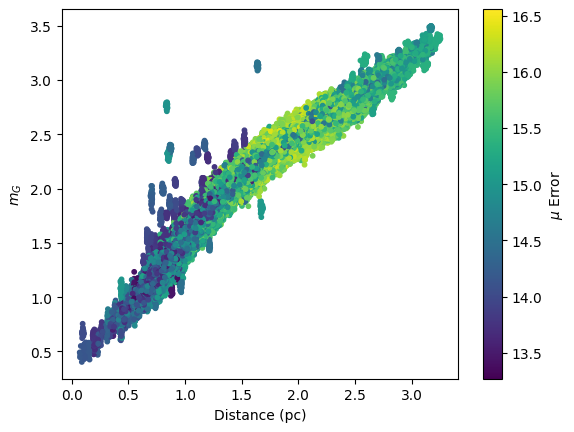

In [ ]:
y=df['i_mean_psf_mag']-df['ks_m']
scatter = plt.scatter(x,y, s=10, c=df['i_mean_psf_mag'], cmap='viridis')  # Use a colormap like 'viridis'

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('$\mu$ Error')  # Label for the colorbar

# Label axes
plt.xlabel('Distance (pc)')
plt.ylabel('$m_G$')

# Show plot
plt.show()

In [5]:
import healpy as hp


ebv_map = hp.read_map('/Users/mattocallaghan/XPNorm/Data/ebv_lhd.hpx.fits', verbose=False)
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
pixel_indices = np.arange(npix)
# Get the pixel centers
l, b = hp.pix2ang(nside, pixel_indices,lonlat=True)
# Choose the indices where the EBV map is low.


In [57]:
b[idx]


array([[ 84.37844624],
       [ 84.37844624],
       [ 84.37844624],
       ...,
       [-82.91425471],
       [-82.91425471],
       [-82.96002698]])

In [45]:
0.02*3.1

0.062000000000000006

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 2.86200e+03, 5.38920e+04, 1.86933e+05]),
 array([-0.01101844, -0.00891659, -0.00681475, -0.00471291, -0.00261106,
        -0.00050922,  0.00159262,  0.00369447,  0.00579631,  0.00789815,
         0.01      ]),
 <BarContainer object of 10 artists>)

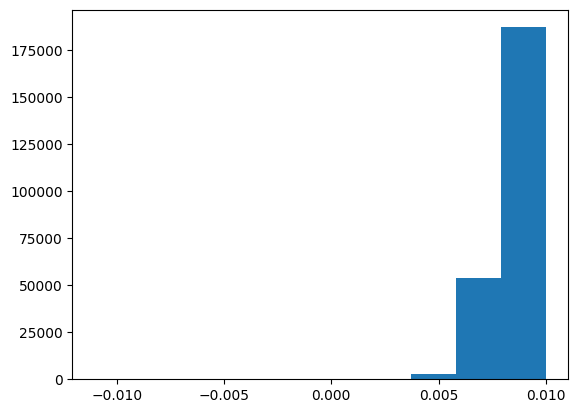

In [48]:
plt.hist(ebv_map[idx])

In [47]:
idx=np.argwhere((~np.isnan(ebv_map))*(ebv_map<0.010))


(array([5.4160e+03, 5.2534e+04, 1.0823e+04, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.6900e+02, 8.7245e+04, 6.7886e+04, 1.9614e+04]),
 array([-81.26564141, -64.1436458 , -47.0216502 , -29.89965459,
        -12.77765899,   4.34433662,  21.46633222,  38.58832783,
         55.71032343,  72.83231903,  89.95431464]),
 <BarContainer object of 10 artists>)

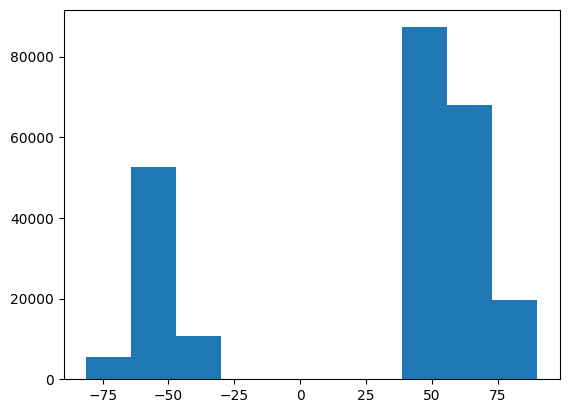

In [49]:
plt.hist(b[idx])

In [50]:
len(b[idx])

243690

In [12]:
np.abs(b[idx]).min()

19.313038905643054

In [19]:
#Query the sky coordinates.
coords = SkyCoord(l=l[idx]*u.degree, b=b[idx]*u.degree, frame='galactic')
ra=coords.icrs.ra.degree
dec=coords.icrs.dec.degree

In [21]:
from dustmaps.planck import PlanckQuery, fetch
#fetch()

In [22]:
planck = PlanckQuery()
Av_planck = 3.1 * planck(coords)


In [97]:
from dustmaps.bayestar import BayestarWebQuery,fetch
#fetch()

694.1 MiB of 694.2 MiB |   2.7 MiB/s |################# |  99% | ETA:   0:00:00

In [160]:
bayestar = BayestarWebQuery()

ebv = bayestar(coords)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...


(array([2.818030e+05, 1.515886e+06, 2.193740e+05, 2.341000e+03,
        1.290000e+02, 4.400000e+01, 2.400000e+01, 6.000000e+00,
        5.000000e+00, 6.000000e+00]),
 array([0.00256478, 0.01511119, 0.0276576 , 0.04020401, 0.05275043,
        0.06529684, 0.07784325, 0.09038966, 0.10293607, 0.11548249,
        0.1280289 ]),
 <BarContainer object of 10 artists>)

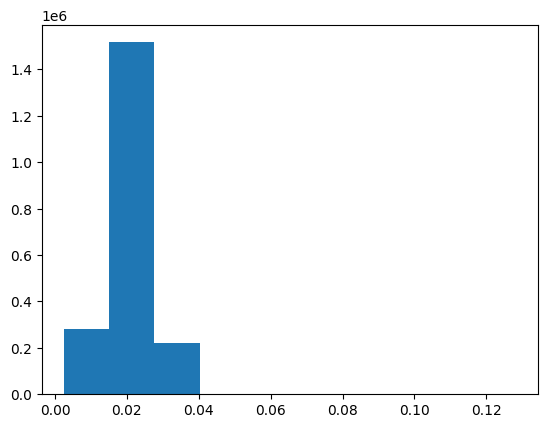

In [31]:
plt.hist(Av_planck[Av_planck<0.4]/3.1)

In [115]:
ebv* 2.742

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
        0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452, 0.16452,
      

In [159]:
(ebv_map[idx]*3.1).max()

0.14251707